This section was done on the genre data, similar to before (with Romance instead of Action). This time, we took special care to consider the like percentile for each user, filtering out those with like value that is smaller than expected.

In [1]:
import pandas as pd 
import numpy as np 
import os

In [2]:
Rom = pd.read_csv(os.path.join("data", "chars_per_mov_genre", "traits", "Romance_traits.csv"))

In [3]:
Rom["like_percentile"].describe()

count    10948.000000
mean         0.111132
std          0.065408
min          0.004673
25%          0.065217
50%          0.097561
75%          0.142857
max          0.500000
Name: like_percentile, dtype: float64

In [5]:
Rom["has_liked"].describe()

count    10948.000000
mean        92.277585
std         75.176756
min         26.000000
25%         42.000000
50%         68.000000
75%        117.000000
max       1046.000000
Name: has_liked, dtype: float64

Given the mean and median of the percentage of likes (for the Romance genre), we will try bands of 10, 15 and 20. Furthermore, I will try some bands for the data.

In [6]:
Rom_15 = Rom.query('like_percentile > 0.15 and has_liked > 50')

In [7]:
Rom_15

,user_id,like_percentile,genre_likes,has_liked,1,2,3,4,5,6,...,16,17,18,19,20,21,22,23,24,25
2,39,0.219178,16,73,3.5,5.0,4.0,2.0,5.0,2.5,...,2.0,1.0,2.5,3.5,5.0,3.0,3.0,3.5,3.5,3.0
5,175,0.169118,69,408,1.3,5.0,3.0,3.0,4.0,2.6,...,2.0,2.0,2.4,2.2,2.0,5.0,1.0,2.0,3.0,4.0
30,658,0.160000,16,100,3.9,3.6,3.9,2.4,2.1,2.7,...,2.2,1.0,2.7,2.8,4.2,5.0,4.8,4.5,3.9,2.5
32,686,0.156250,10,64,2.0,1.2,4.0,3.0,3.4,1.4,...,1.0,2.1,5.0,2.4,3.5,3.3,3.8,4.5,1.4,3.0
35,718,0.166667,12,72,3.3,3.5,2.7,2.3,3.2,2.7,...,2.8,2.8,2.0,2.5,2.1,3.9,1.8,3.2,2.9,3.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10930,395334,0.250000,21,84,3.6,4.6,5.0,3.7,3.9,5.0,...,1.0,2.2,2.5,2.3,5.0,3.0,3.0,4.5,3.8,3.9
10934,395642,0.155556,21,135,3.4,1.1,4.8,3.5,3.4,2.4,...,2.4,2.4,2.4,2.4,2.5,3.0,3.0,2.6,2.3,2.5
10935,395678,0.186275,19,102,3.0,5.0,3.0,3.0,3.0,3.0,...,1.0,3.0,3.6,3.0,3.0,3.0,3.0,3.0,1.0,1.0
10940,396078,0.150685,22,146,2.6,3.3,3.0,3.0,3.2,1.9,...,3.0,2.6,3.8,2.6,2.5,3.0,3.0,3.3,2.5,2.9


In [9]:
Rom_15.drop(["like_percentile", "user_id", "genre_likes", "has_liked"], axis = 1).describe().sort_values(["std"], axis = 1)

,22,21,19,16,14,24,25,12,10,4,...,17,23,1,9,6,11,5,8,13,2
count,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,...,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000
mean,3.016281,3.106050,2.524110,2.317260,3.747509,2.857117,2.881940,2.807117,2.814769,2.756851,...,2.400712,3.551957,2.795463,2.890747,3.247331,2.943327,3.528203,2.903381,2.504804,3.377135
std,0.491306,0.509254,0.770052,0.776494,0.797181,0.815442,0.842104,0.856083,0.865493,0.868627,...,0.946117,0.951881,0.960487,0.971455,0.982755,0.992967,0.998234,1.001951,1.029630,1.073705
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,2.000000,1.900000,3.300000,2.400000,2.400000,2.400000,2.400000,2.300000,...,1.800000,3.000000,2.200000,2.300000,2.500000,2.400000,3.000000,2.300000,1.800000,2.500000
50%,3.000000,3.000000,2.500000,2.400000,3.700000,2.800000,2.700000,2.700000,2.600000,2.700000,...,2.400000,3.600000,2.700000,2.800000,3.200000,3.000000,3.600000,3.000000,2.400000,3.400000
75%,3.000000,3.000000,3.000000,2.700000,4.300000,3.500000,3.500000,3.500000,3.500000,3.300000,...,3.000000,4.300000,3.500000,3.500000,4.000000,3.600000,4.300000,3.600000,3.300000,4.200000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


Traits with relatively higher variance:   
* 2 - Reserved
* 13 - Calm
* 8 - Lazy
* 5 - Crude/rude
* 6 - Cynical
* 11 - Easy-going
* 17 - Lowbrow

In [21]:
from sklearn.decomposition import PCA
X = Rom_15.to_numpy()[:, 4:]
pca = PCA(n_components=0.95)
pca.fit(X)
print(pca.explained_variance_ratio_)

[0.13401164 0.11295436 0.09903292 0.07835845 0.04787209 0.04506772
 0.04089129 0.03593511 0.03443136 0.03341436 0.03201105 0.03117961
 0.03019056 0.02875062 0.02691662 0.02485516 0.02332821 0.02246395
 0.02111301 0.02035808 0.01859607 0.01786656]


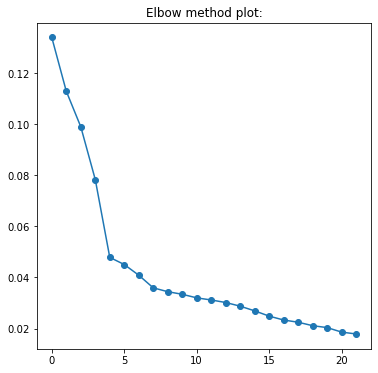

In [22]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
ax.plot(pca.explained_variance_ratio_, marker='o')
ax.set_title('Elbow method plot:')
plt.show()

The plot of explained variances also contains a bend around 5 or so PCs, almost identical to the action genre with no like percentage filtering.


For clustering, we will default to using cosine similarity with kmeans for the time being.

In [14]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [23]:
# Normalizing data -> euclidean dist is linearly connected to cosine similarity when vectors are normalized
from sklearn.preprocessing import normalize
X_norm = normalize(X)

In [24]:
# Trying different # of clusters manually
kmeans = KMeans(4, n_init = 100, random_state = 42)
kmeans.fit(X_norm)

KMeans(n_clusters=4, n_init=100, random_state=42)

<AxesSubplot:>

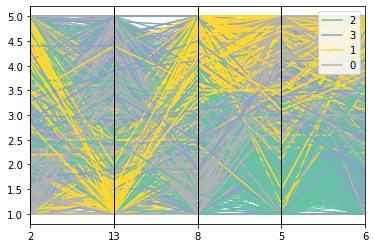

In [19]:
from matplotlib import cm
Rom["labs"] = kmeans.labels_
pd.plotting.parallel_coordinates(Rom, class_column = "labs", colormap = cm.get_cmap("Set2"), cols = ["2", "13", "8", "5", "6"])

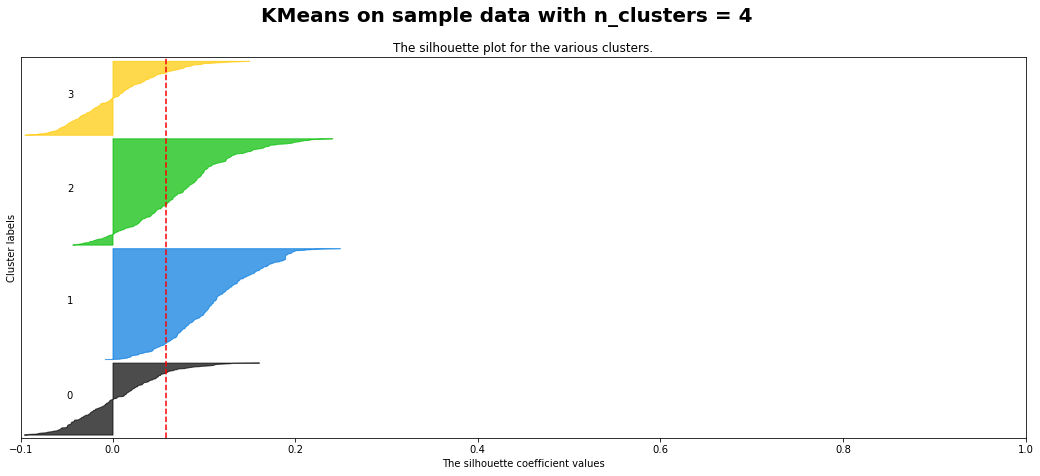

In [25]:
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score

n_clusters = 4

fig, ax1 = plt.subplots(1)
fig.set_size_inches(18, 7)
ax1.set_xlim([-0.1, 1])
ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

silhouette_avg = silhouette_score(X, kmeans.labels_)
sample_silhouette_values = silhouette_samples(X, kmeans.labels_)

y_lower = 10
for i in range(n_clusters):
    ith_cluster_silhouette_values = np.sort(sample_silhouette_values[kmeans.labels_ == i])
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                    0, ith_cluster_silhouette_values,
                    facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10  

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster labels")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.suptitle(("KMeans on sample data "
            "with n_clusters = {:d}".format(n_clusters)),
            fontsize=20, fontweight='bold')
plt.show()

Some observations from silhouete plot:  
4) Some of the clusters contain a large segment of poorly matched data points -> many negative silhouette values.  
5) The is worse with 5 clusters, as the problem extends to clusters 1 and 2 -> maybe hit local minima when optimizing.  
10) The problem does not go away with many clusters (going higher than 10 did not really help).

In [27]:
def make_generator(parameters):
    if not parameters:
        yield dict()
    else:
        key_to_iterate = list(parameters.keys())[0]
        next_round_parameters = {p : parameters[p]
                    for p in parameters if p != key_to_iterate}
        for val in parameters[key_to_iterate]:
            for pars in make_generator(next_round_parameters):
                temp_res = pars
                temp_res[key_to_iterate] = val
                yield temp_res

In [41]:
def eval_cluster_size(sizes):
    metrics = {"n_clusters": [], "sil_score": [], "inertia": []}
    for p in make_generator(sizes):
        cluster = KMeans( **p, n_init = 20)
        cluster.fit(X)
        for k, v in p.items():
            metrics[k].append(v)
        num_clusters = len(np.unique(cluster.labels_))
        metrics["sil_score"].append(silhouette_score(X, cluster.labels_))
        metrics["inertia"].append(cluster.inertia_)
    return pd.DataFrame.from_dict(metrics)

We should probably narrow down the search to smaller clusters (silhouette score is certainly going down with increased cluster size).

In [42]:
sizes_dict = {"n_clusters": list(range(2, 11))}
eval_cluster_size(sizes_dict)

,n_clusters,sil_score,inertia
0,2,0.079098,20540.142135
1,3,0.069845,19421.951952
2,4,0.062813,18683.562157
3,5,0.052628,18127.313521
4,6,0.046526,17698.862958
5,7,0.049011,17359.811123
6,8,0.046181,17075.222507
7,9,0.042998,16793.219770
8,10,0.040344,16590.970179


It looks like silhouette score peaks at around 5 clusters, we will try that for now.

In [75]:

def eval_data_filter(params, drop_cols):
    metrics = {"min_percent": [], "min_likes": [], "sil_score": [], "inertia": []}
    for p in make_generator(params):
        for k, v in p.items():
            metrics[k].append(v)
        #print(p["min_percent"])
        #print(p["min_likes"])
        X_cur = Rom[(Rom["like_percentile"] > p["min_percent"]) & (Rom["has_liked"] > p["min_likes"])] \
            .drop(drop_cols, axis = 1).to_numpy()
        if(X_cur.shape[0] < 5):
            print("here!")
            metrics["sil_score"].append(np.nan)
            metrics["inertia"].append(np.nan)
            continue
        cluster = KMeans(n_clusters=5)
        cluster.fit(X_cur)
        
        metrics["sil_score"].append(silhouette_score(X_cur, cluster.labels_))
        metrics["inertia"].append(cluster.inertia_)
    return pd.DataFrame(metrics)

In [76]:
drop_cols = ["user_id", "like_percentile", "genre_likes", "has_liked"] + ["labs"] if "labs" in Rom.columns else []
params = {"min_percent": [.10, .15, .20, .25], "min_likes": [25, 50, 75, 100, 200]}
metrics_df = eval_data_filter(params, drop_cols)

0.1
25
0.1
50
0.1
75
0.1
100
0.1
200
0.15
25
0.15
50
0.15
75
0.15
100
0.15
200
0.2
25
0.2
50
0.2
75
0.2
100
0.2
200
here!
0.25
25
0.25
50
0.25
75
0.25
100
here!
0.25
200
here!


,min_percentile,min_likes,sil_score,inertia
0,0.10,25,0.053099,84101.712911
1,0.10,50,0.051893,48801.909619
2,0.10,75,0.056943,30477.987191
3,0.10,100,0.048761,20289.974423
4,0.10,200,0.051216,4403.091416
5,0.15,25,0.047996,39344.340264
6,0.15,50,0.054337,18129.279531
7,0.15,75,0.058642,9220.039820
8,0.15,100,0.048502,4859.795948
9,0.15,200,0.089285,626.114583


It seems that filtering the data more and more leads to better clustering results in general, which is rather unsuprising. Unfortunately, it seems like using thresholds that are too strict may lead to a data set that is too small. It seems like a higher minimum like percentile worked better than a higher min number of likes in this sense. Overall, the silhouette values are not entirely satisfactory.